In [2]:
#Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# Step 2: Load and Explore the Dataset
df = pd.read_csv('New Year Sales Data.csv', encoding='ISO-8859-1')
print("Initial shape:", df.shape)
print(df.head())

Initial shape: (11251, 15)
   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       Na

In [8]:
# Step 3: Data Cleaning
# Drop unnamed column if exists
df.drop(columns=[col for col in df.columns if "unnamed" in col.lower()], inplace=True)

In [10]:
# Check for nulls
print("\nNull values:\n", df.isnull().sum())


Null values:
 User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
dtype: int64


In [12]:
# Drop rows with nulls in important columns
df.dropna(subset=['Cust_name', 'Gender', 'Age Group', 'State', 'Amount'], inplace=True)

In [14]:
# Convert 'Amount' to integer
df['Amount'] = df['Amount'].astype(float).astype(int)

In [16]:
# Step 4: Data Overview and Summary
print("\nData Summary:\n", df.describe())
print("\nUnique values per column:\n", df.nunique())


Data Summary:
             User_ID           Age  Marital_Status        Orders        Amount  \
count  1.123900e+04  11239.000000    11239.000000  11239.000000  11239.000000   
mean   1.003004e+06     35.410357        0.420055      2.489634   9453.610553   
std    1.716039e+03     12.753866        0.493589      1.114967   5222.355168   
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000   
25%    1.001492e+06     27.000000        0.000000      2.000000   5443.000000   
50%    1.003064e+06     33.000000        0.000000      2.000000   8109.000000   
75%    1.004426e+06     43.000000        1.000000      3.000000  12675.000000   
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000   

       Status  
count     0.0  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN  

Unique values per column:
 User_ID             3752
Cust_name           1250
Product_ID          2350
Gender 

In [18]:
# EDA Section

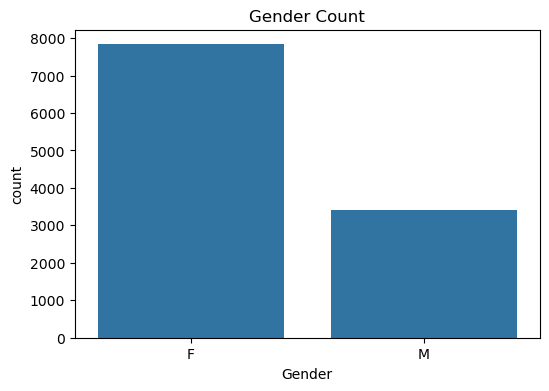

In [20]:
# 1. Gender Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Count')
plt.show()

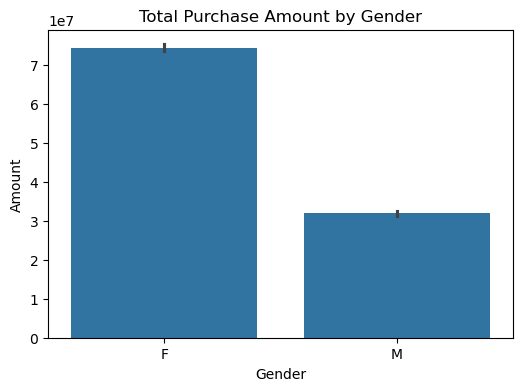

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Gender', y='Amount', estimator=sum)
plt.title('Total Purchase Amount by Gender')
plt.show()

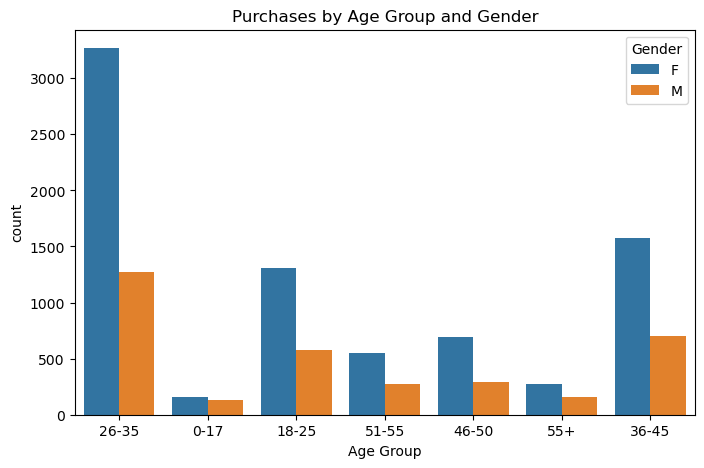

In [24]:
# 2. Age Group Analysis
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Age Group', hue='Gender')
plt.title('Purchases by Age Group and Gender')
plt.show()

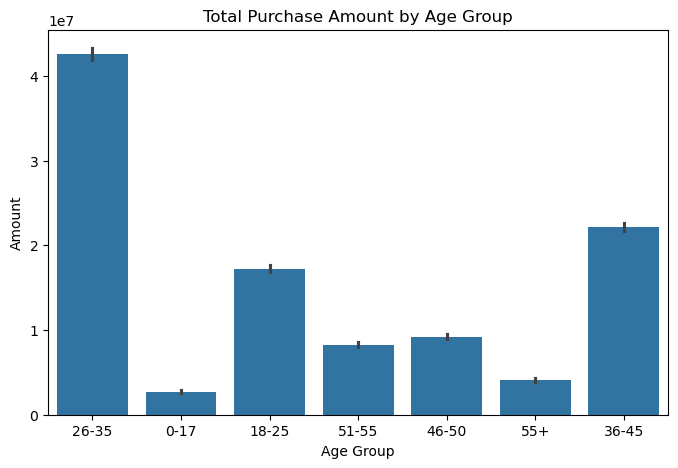

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Age Group', y='Amount', estimator=sum)
plt.title('Total Purchase Amount by Age Group')
plt.show()

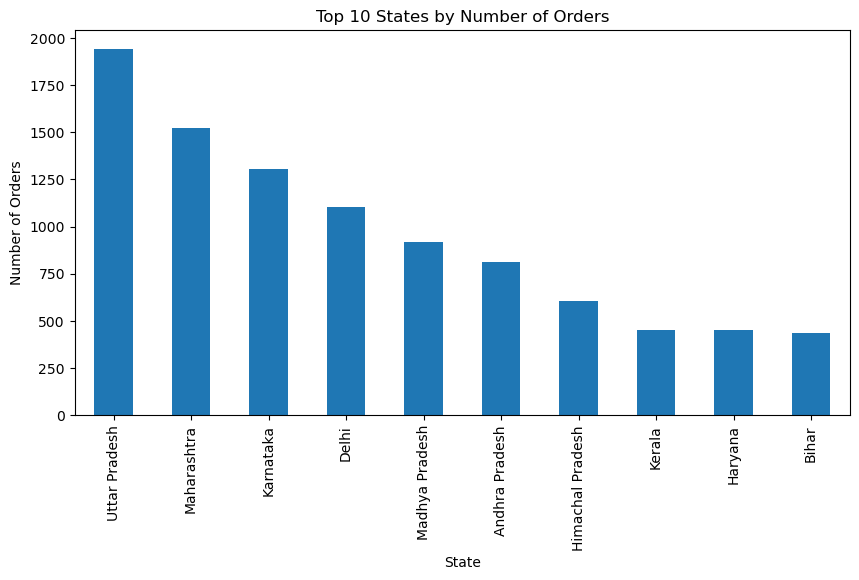

In [30]:
# 3. State Analysis
top_states_orders = df['State'].value_counts().head(10)
top_states_amount = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_states_orders.plot(kind='bar')
plt.title('Top 10 States by Number of Orders')
plt.ylabel('Number of Orders')
plt.show()

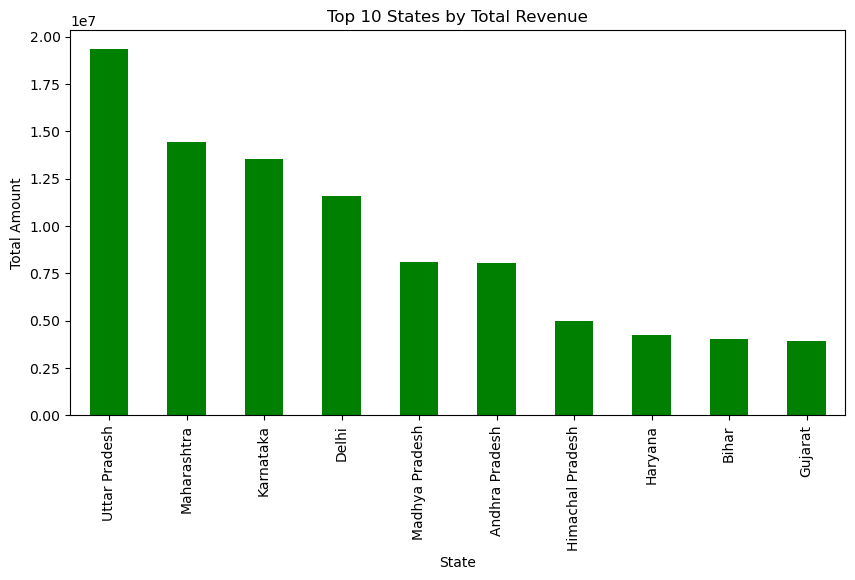

In [32]:
plt.figure(figsize=(10,5))
top_states_amount.plot(kind='bar', color='green')
plt.title('Top 10 States by Total Revenue')
plt.ylabel('Total Amount')
plt.show()

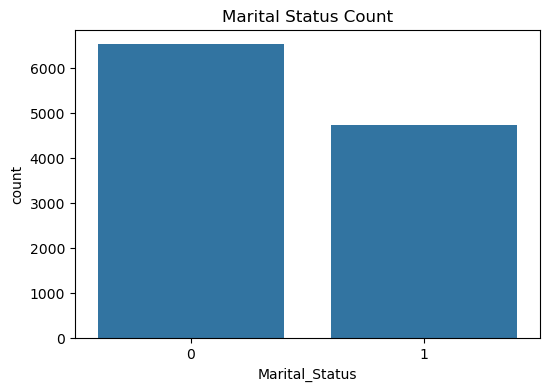

In [34]:
# 4. Marital Status Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Marital_Status')
plt.title('Marital Status Count')
plt.show()

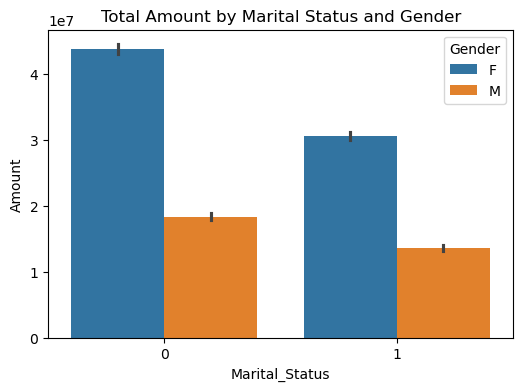

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Marital_Status', y='Amount', hue='Gender', estimator=sum)
plt.title('Total Amount by Marital Status and Gender')
plt.show()

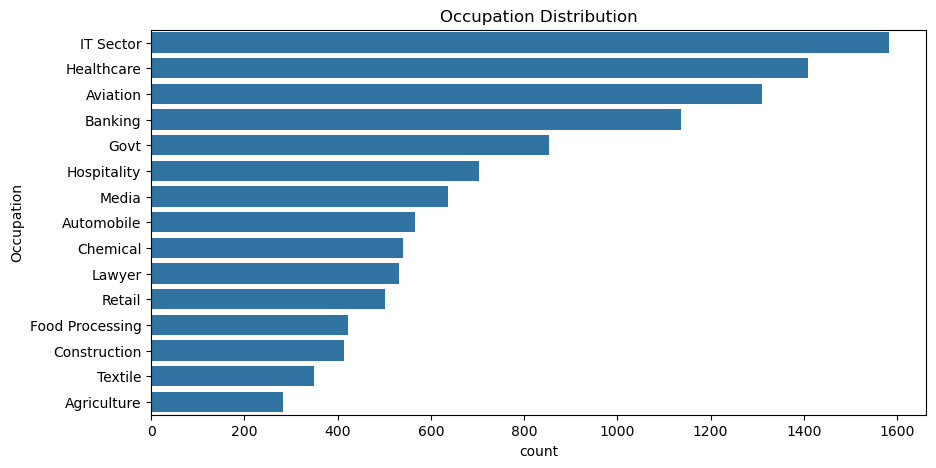

In [38]:
# 5. Occupation Analysis
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Occupation', order=df['Occupation'].value_counts().index)
plt.title('Occupation Distribution')
plt.show()

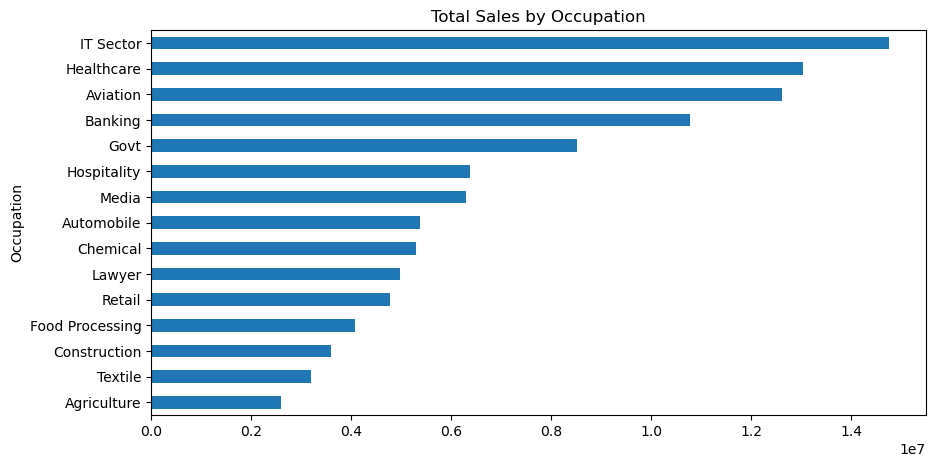

In [40]:
plt.figure(figsize=(10,5))
df.groupby('Occupation')['Amount'].sum().sort_values().plot(kind='barh')
plt.title('Total Sales by Occupation')
plt.show()

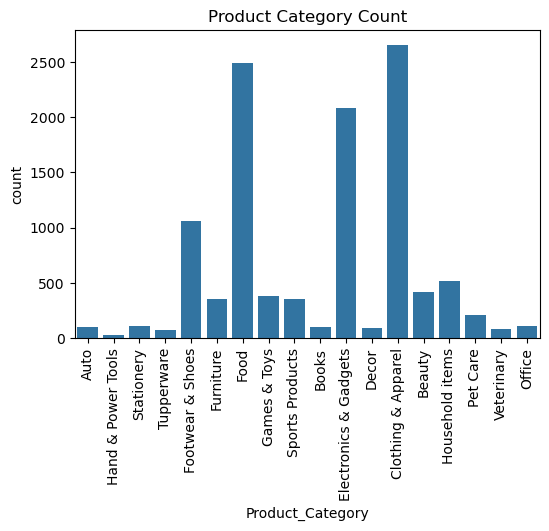

In [46]:
# 6. Product Category Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Product_Category')
plt.xticks(rotation=90)
plt.title('Product Category Count')
plt.show()

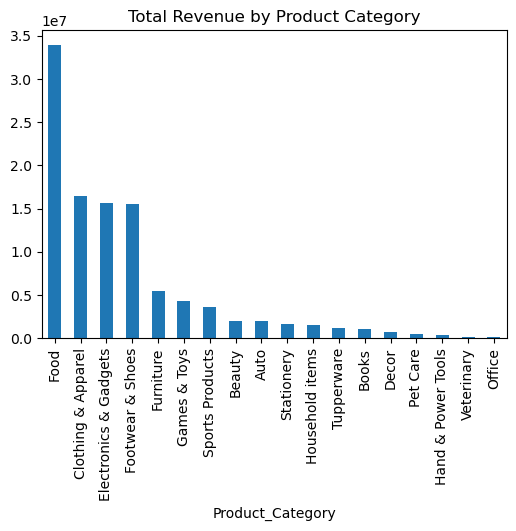

In [44]:
plt.figure(figsize=(6,4))
df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Revenue by Product Category')
plt.show()